# Linear regression

## 1. Uni-variate linear regression

### 1.1. Least square estimate
One of the basic models to try, while learning dependence between two real-valued variables $X$ and $Y$ is a uni-variate linear regression:
$$
y=w x.
$$

Admitting that the model's accuracy is not be absolute: 
$$
y=w x + \varepsilon,\hspace{5ex} (1.1)
$$
where $\varepsilon$ is the model's error (often called noise or residual).

The objective is to learn $w$ given a training set of $\{(x_i, y_i), i=1..N\}$ providing the best possible fit for the model. The fit could be characterized by the errors of the model
$$
\varepsilon_i=y_i-w x_i
$$
and in particular by their sum of squares:
$$
RSS(w)=\sum\limits_i \varepsilon_i^2=\sum\limits_i (y_i-w x_i)^2. \hspace{5ex} (1.2)
$$
Minimizing such $RSS(w)\to min$ is called a least square approach. With respect to this criteria, regression becomes an optimization problem
$$
\hat{w}=argmin_w RSS(w). \hspace{5ex} (1.3)
$$
Luckily this problem has a precise analytic solution following from RSS function's shape and local extremum criteria:
$$
RSS'(w)=0,
$$
i.e.
$$
0=\frac{d\sum\limits_i (y_i-w x_i)^2}{dw}=\sum\limits_i\frac{d (y_i-w x_i)^2}{dw}=\sum\limits_i -2 x_i(y_i-w x_i),
$$$$
0=\sum\limits_i x_i y_i- w \sum\limits_i (x_i)^2,
$$$$
\sum\limits_i x_i y_i = w \sum\limits_i (x_i)^2,
$$$$
w=\frac{\sum\limits_i x_i y_i}{\sum\limits_i (x_i)^2}. \hspace{5ex} (1.4)
$$
Thinking of $x_i$ and $y_i$ as the observations of random variables $X$ and $Y$ this can be rewritten as
$$
w=\frac{E[XY]}{E[X^2]}.
$$

### 1.2. Case of normalized variables 
In case variables $x,y$ were normalized as
$$
x:=\frac{x-E[X]}{\sigma[X]},\ y:=\frac{y-E[Y]}{\sigma[Y]}
$$
in order to ensure zero averages $E[X]=E[Y]=0$ and unit standard deviations $\sigma[X]=\sigma[Y]=1$, the equation for $w$ could be rewritten as
$$
w=\frac{E[XY]-E[X]E[Y]}{E[X^2]-E[X]^2}=\frac{E[XY]-E[X]E[Y]}{\sigma[X]^2}=\frac{E[XY]-E[X]E[Y]}{\sigma[X]\sigma[Y]}=corr(X,Y).
$$
So in case of normalized $x,y$ a best fit univariate linear regression is provided by an equation
$$
y=corr(X,Y)x
$$



### 2.3. Regression performance: R-squared

In the same way as for the bi-variate regression:
$$
R^2=1-\frac{RSS}{\sum\limits_i (y_i-\overline{y})^2}=\frac{\sum\limits_i (\hat{y}_i-\overline{y})^2}{\sum\limits_i (y_i-\overline{y})^2},
$$
where $\overline{y}=\sum\limits_i y_i$ is the sample mean of observed values of responce variable, while $\hat{y}_i=w^T x_i$ is the predicted value of output variable as compared to the observed value of $y_i$ corresponding to $x=x_i$. This way $R^2$ is often interpreted as a fraction of responce variable's variance explained by linear model. $R^2=1$ is equivalent to $RSS=0$, i.e. the model fits the observations exactly, i.e. responce variable depends linearly on the explaining variables. On the other hand, $R^2=0$ means that the model always predicts the sample mean $\overline{y}$, i.e. explaining variables $x$ have no effect on responce variable $y$. 

Least-square criteria is equivalent to maximizing $R^2$.

In case of a bi-variate regression with intercept $R^2=corr(Y,X)^2$, i.e. is a square of a correlation coefficient between observations of input and output variables.

## Case 1. Real estate prices in NYC

All real estate sales accross NYC could be found on

https://www1.nyc.gov/site/finance/taxes/property-rolling-sales-data.page

Consider data for Staten Island and ask a question: 
### **which characteristic of the house would be the best predictor for its price?**

In [87]:
import pandas as pd
import numpy as np
import geopandas as gpd
import statsmodels.formula.api as smf
import matplotlib.pylab as plt
import math
from scipy import stats
%matplotlib inline

In [3]:
#load the house sales data from staten island
REStaten=pd.read_csv('data/rollingsales_statenisland.csv')

In [4]:
#look at the format
REStaten.head()

,BOROUGH,NEIGHBORHOOD,BUILDING_CLASS_CATEGORY,TAX_CLASS_AT_PRESENT,BLOCK,LOT,EASE-MENT,BUILDING_CLASS_AT_PRESENT,ADDRESS,APARTMENT_NUMBER,...,RESIDENTIAL_UNITS,COMMERCIAL_UNITS,TOTAL_UNITS,LAND_SQUARE_FEET,GROSS_SQUARE_FEET,YEAR_BUILT,TAX_CLASS_AT_TIME_OF_SALE,BUILDING_CLASS_AT_TIME_OF_SALE,SALE_PRICE,SALE_DATE
0,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,5391,65,,A3,22 BLUE HERON DRIVE,,...,1,0,1,8000,3000,1987,1,A3,1185000,3/19/18
1,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,5395,19,,A1,4 EDWIN STREET,,...,1,0,1,7258,2230,1980,1,A1,866000,8/3/17
2,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,5406,26,,A2,87 ELMBANK STREET,,...,1,0,1,5000,912,1950,1,A2,530000,4/27/18
3,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,5407,10,,A2,112 ELMBANK STREET,,...,1,0,1,6242,1768,1975,1,A2,735000,11/7/17
4,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,6205,15,,A5,95 EAGAN AVENUE,,...,1,0,1,1546,1579,1986,1,A5,475000,9/7/17


In [5]:
#a more concise way to get the list of column names
REStaten.columns

Index(['BOROUGH', 'NEIGHBORHOOD', 'BUILDING_CLASS_CATEGORY',
       'TAX_CLASS_AT_PRESENT', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING_CLASS_AT_PRESENT', 'ADDRESS', 'APARTMENT_NUMBER', 'ZIP_CODE',
       'RESIDENTIAL_UNITS', 'COMMERCIAL_UNITS', 'TOTAL_UNITS',
       'LAND_SQUARE_FEET', 'GROSS_SQUARE_FEET', 'YEAR_BUILT',
       'TAX_CLASS_AT_TIME_OF_SALE', 'BUILDING_CLASS_AT_TIME_OF_SALE',
       'SALE_PRICE', 'SALE_DATE'],
      dtype='object')

In [6]:
#get some statistics; does not make sense for categorical columns, like zip code, lot etc, but gives an idea of distributions for house characteristics  
REStaten.describe()

,BOROUGH,BLOCK,LOT,ZIP_CODE,RESIDENTIAL_UNITS,COMMERCIAL_UNITS,TOTAL_UNITS,LAND_SQUARE_FEET,GROSS_SQUARE_FEET,YEAR_BUILT,TAX_CLASS_AT_TIME_OF_SALE,SALE_PRICE
count,8706.0,8706.000000,8706.000000,8706.000000,8706.000000,8706.000000,8706.000000,8.706000e+03,8706.000000,8706.000000,8706.000000,8.706000e+03
mean,5.0,3319.292212,208.871468,10132.832989,1.257179,0.062486,1.324144,5.016016e+03,1689.650930,1884.641282,1.171721,3.918813e+05
std,0.0,2344.202564,453.187678,1332.608872,1.579128,0.722336,1.718008,3.779630e+04,5804.911675,400.438263,0.601193,8.260853e+05
min,5.0,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,1.000000,0.000000e+00
25%,5.0,1116.000000,25.000000,10305.000000,1.000000,0.000000,1.000000,2.000000e+03,960.000000,1944.000000,1.000000,0.000000e+00
50%,5.0,3121.000000,56.000000,10308.000000,1.000000,0.000000,1.000000,3.125000e+03,1400.000000,1975.000000,1.000000,3.858250e+05
75%,5.0,5432.000000,135.000000,10312.000000,2.000000,0.000000,2.000000,4.520000e+03,1974.000000,1990.000000,1.000000,5.800000e+05
max,5.0,8050.000000,5359.000000,10314.000000,84.000000,43.000000,84.000000,3.014056e+06,349503.000000,2018.000000,4.000000,4.725000e+07


In [7]:
#as we see sale price and house size could be as low as zero. Exclude missing/unrealistic values by defining a reliable data index
#also take only houses with residential units
ind=(REStaten.SALE_PRICE>50000)&(REStaten.GROSS_SQUARE_FEET>300)&(REStaten.LAND_SQUARE_FEET>300)&(REStaten.RESIDENTIAL_UNITS>0)&(REStaten.YEAR_BUILT>160)

In [8]:
#ind

In [9]:
#filter the data; loc accesses rows by boolean index (as opposed to integer positions done with iloc)
REStaten_=REStaten.loc[ind].copy()

In [10]:
REStaten_.shape

(4866, 21)

In [11]:
REStaten_.describe()

,BOROUGH,BLOCK,LOT,ZIP_CODE,RESIDENTIAL_UNITS,COMMERCIAL_UNITS,TOTAL_UNITS,LAND_SQUARE_FEET,GROSS_SQUARE_FEET,YEAR_BUILT,TAX_CLASS_AT_TIME_OF_SALE,SALE_PRICE
count,4866.0,4866.000000,4866.000000,4866.000000,4866.000000,4866.000000,4866.000000,4866.000000,4866.000000,4866.000000,4866.000000,4.866000e+03
mean,5.0,3462.579326,79.148993,10307.940608,1.342376,0.018085,1.360460,3906.581176,1740.041102,1967.412043,1.020345,5.631876e+05
std,0.0,2390.676182,92.461180,4.088231,1.128679,0.200927,1.175613,3230.453434,1318.247231,31.816460,0.208250,3.802599e+05
min,5.0,13.000000,1.000000,10301.000000,1.000000,0.000000,1.000000,315.000000,330.000000,1859.000000,1.000000,5.070000e+04
25%,5.0,1093.250000,23.000000,10305.000000,1.000000,0.000000,1.000000,2300.000000,1216.000000,1945.000000,1.000000,4.050000e+05
50%,5.0,3373.500000,49.000000,10308.000000,1.000000,0.000000,1.000000,3325.000000,1512.000000,1975.000000,1.000000,5.335000e+05
75%,5.0,5523.000000,97.000000,10312.000000,2.000000,0.000000,2.000000,4536.000000,2050.000000,1993.000000,1.000000,6.557782e+05
max,5.0,8050.000000,926.000000,10314.000000,42.000000,7.000000,43.000000,63624.000000,58792.000000,2017.000000,4.000000,2.000000e+07


Get a better idea of the data by looking at the distribution (histograms) of the key characteristics

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024DECCE1748>]],
      dtype=object)

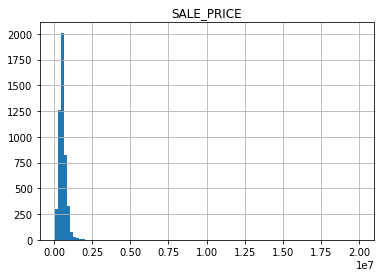

In [12]:
#start with the price
REStaten_.hist('SALE_PRICE',bins=100)

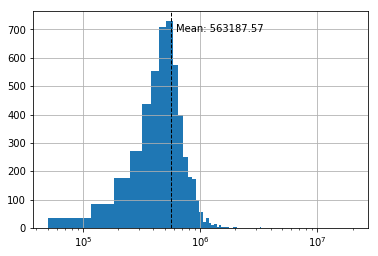

In [13]:
#as the distribution is highly skewed to the left, try log-histogram 
fig, ax = plt.subplots()
ax.set_xscale('log')
REStaten_['SALE_PRICE'].hist(ax=ax,bins=300)
#add mean price
mu=REStaten_['SALE_PRICE'].mean()
plt.axvline(mu, color='k', linestyle='dashed', linewidth=1) 
min_ylim, max_ylim = plt.ylim()
plt.text(mu*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(mu));

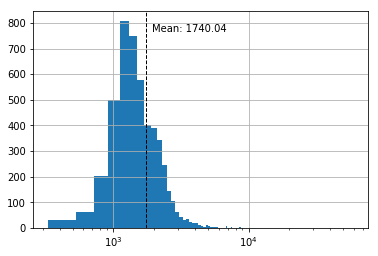

In [14]:
#distribution of house sizes, log-scale
fig, ax = plt.subplots()
ax.set_xscale('log')
REStaten_['GROSS_SQUARE_FEET'].hist(ax=ax,bins=300)
#add mean price
mu=REStaten_['GROSS_SQUARE_FEET'].mean()
plt.axvline(mu, color='k', linestyle='dashed', linewidth=1) 
min_ylim, max_ylim = plt.ylim()
plt.text(mu*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(mu));

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024DECC67208>]],
      dtype=object)

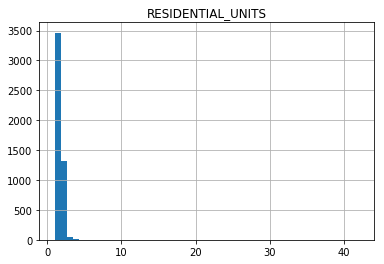

In [15]:
REStaten_.hist('RESIDENTIAL_UNITS',bins=50)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024DED317668>]],
      dtype=object)

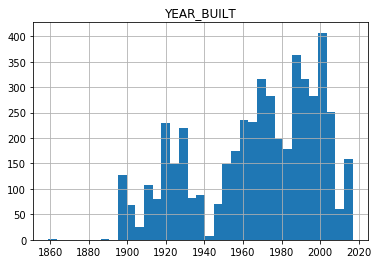

In [16]:
#year built distirbution - clearly there were two major period: pre- and post- World War II
REStaten_.hist('YEAR_BUILT',bins=35)

In [17]:
#now find the most expensive house
REStaten_.loc[REStaten_['SALE_PRICE'].idxmax()]

BOROUGH                                                                     5
NEIGHBORHOOD                                          NEW BRIGHTON-ST. GEORGE
BUILDING_CLASS_CATEGORY           08 RENTALS - ELEVATOR APARTMENTS           
TAX_CLASS_AT_PRESENT                                                        2
BLOCK                                                                      13
LOT                                                                        60
EASE-MENT                                                                    
BUILDING_CLASS_AT_PRESENT                                                  D6
ADDRESS                                                 224 RICHMOND TERRACE 
APARTMENT_NUMBER                                                             
ZIP_CODE                                                                10301
RESIDENTIAL_UNITS                                                          40
COMMERCIAL_UNITS                                                

In [18]:
#and the largest one - the same house apparently!
REStaten_.loc[REStaten_['GROSS_SQUARE_FEET'].idxmax()]

BOROUGH                                                                     5
NEIGHBORHOOD                                          NEW BRIGHTON-ST. GEORGE
BUILDING_CLASS_CATEGORY           08 RENTALS - ELEVATOR APARTMENTS           
TAX_CLASS_AT_PRESENT                                                        2
BLOCK                                                                      13
LOT                                                                        60
EASE-MENT                                                                    
BUILDING_CLASS_AT_PRESENT                                                  D6
ADDRESS                                                 224 RICHMOND TERRACE 
APARTMENT_NUMBER                                                             
ZIP_CODE                                                                10301
RESIDENTIAL_UNITS                                                          40
COMMERCIAL_UNITS                                                

Now look at the correlation between all the quantitative parameters of the properties

In [19]:
REStaten_[['YEAR_BUILT','RESIDENTIAL_UNITS','COMMERCIAL_UNITS','GROSS_SQUARE_FEET','LAND_SQUARE_FEET','SALE_PRICE']].corr()

,YEAR_BUILT,RESIDENTIAL_UNITS,COMMERCIAL_UNITS,GROSS_SQUARE_FEET,LAND_SQUARE_FEET,SALE_PRICE
YEAR_BUILT,1.000000,-0.044512,-0.082578,0.048370,-0.212966,0.105413
RESIDENTIAL_UNITS,-0.044512,1.000000,0.149435,0.771761,0.215693,0.558894
COMMERCIAL_UNITS,-0.082578,0.149435,1.000000,0.306401,0.064640,0.195430
GROSS_SQUARE_FEET,0.048370,0.771761,0.306401,1.000000,0.399676,0.782826
LAND_SQUARE_FEET,-0.212966,0.215693,0.064640,0.399676,1.000000,0.428592
SALE_PRICE,0.105413,0.558894,0.195430,0.782826,0.428592,1.000000


Size, land area and the number of residential units appear to demonstrate the strongest correlations

Perform a uni-variate linear regression on the feature showing the strongest correlation - the size

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
#fit the regression without intercept
lm = LinearRegression(fit_intercept=False).fit(REStaten_[['GROSS_SQUARE_FEET']], REStaten_['SALE_PRICE'])

In [22]:
#slope coefficient
lm.coef_

array([287.9862361])

In [23]:
#fit regression with intercept
lm = LinearRegression(fit_intercept=True).fit(REStaten_[['GROSS_SQUARE_FEET']], REStaten_['SALE_PRICE'])

In [24]:
lm.coef_

array([225.81285046])

In [25]:
print('Price~{}*Size+{}'.format(lm.coef_[0],lm.intercept_))

Price~225.81285045689492*Size+170263.92882602802


Now standardize the sale_price and gross_square_feet by subtracting averages and dividing by standard deviation
$$
X^*:=(X-E[X])/\sigma(X)
$$
Repeat the regression. Compare the regression coefficient against the correlation between sale_price and gross_square_feet. Do you find smth interesting here? Does the slope coefficient remind you something?

In [26]:
REStaten_['PRICE_stand']=(REStaten_['SALE_PRICE']-REStaten_['SALE_PRICE'].mean())/REStaten_['SALE_PRICE'].std()

In [27]:
REStaten_['SIZE_stand']=(REStaten_['GROSS_SQUARE_FEET']-REStaten_['GROSS_SQUARE_FEET'].mean())/REStaten_['GROSS_SQUARE_FEET'].std()

In [28]:
#alternative implementation with statistical summary

In [29]:
lm = smf.OLS(REStaten_['PRICE_stand'],REStaten_['SIZE_stand']).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:            PRICE_stand   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.613
Method:                 Least Squares   F-statistic:                     7700.
Date:                Sun, 29 Sep 2019   Prob (F-statistic):               0.00
Time:                        14:32:13   Log-Likelihood:                -4595.5
No. Observations:                4866   AIC:                             9193.
Df Residuals:                    4865   BIC:                             9199.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
SIZE_stand     0.7828      0.009     87.750      0.0

In [30]:
#alternative with fomulae (-1 stands for no intercept as it inclused one by default)
lm = smf.ols(formula='PRICE_stand~SIZE_stand-1', data = REStaten_).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:            PRICE_stand   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.613
Method:                 Least Squares   F-statistic:                     7700.
Date:                Sun, 29 Sep 2019   Prob (F-statistic):               0.00
Time:                        14:32:13   Log-Likelihood:                -4595.5
No. Observations:                4866   AIC:                             9193.
Df Residuals:                    4865   BIC:                             9199.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
SIZE_stand     0.7828      0.009     87.750      0.0

In [31]:
#now get back to the orignal non-standardised regression
lm = smf.ols(formula='SALE_PRICE~GROSS_SQUARE_FEET', data = REStaten_).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:             SALE_PRICE   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.613
Method:                 Least Squares   F-statistic:                     7698.
Date:                Sun, 29 Sep 2019   Prob (F-statistic):               0.00
Time:                        14:32:13   Log-Likelihood:                -67117.
No. Observations:                4866   AIC:                         1.342e+05
Df Residuals:                    4864   BIC:                         1.343e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          1.703e+05   5618.03

In [32]:
#without intercept
lm = smf.ols(formula='SALE_PRICE~GROSS_SQUARE_FEET-1', data = REStaten_).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:             SALE_PRICE   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                 2.889e+04
Date:                Sun, 29 Sep 2019   Prob (F-statistic):               0.00
Time:                        14:32:13   Log-Likelihood:                -67538.
No. Observations:                4866   AIC:                         1.351e+05
Df Residuals:                    4865   BIC:                         1.351e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
GROSS_SQUARE_FEET   287.9862      1.69

The summary does not only return the coefficient estimate but also a lot of statistics including standard error and confidence interval for it. Where do those come from as the formulae (2.3) seem perfectly robust. Illustrate uncertainty in the model estimates using the experiment below.

In [33]:
#perform regression on 100 subsamples
np.random.seed(2019)
W=[]
for i in range(0,100):
    df=REStaten_.sample(frac=0.99)
    lm = smf.ols(formula='SALE_PRICE~GROSS_SQUARE_FEET-1', data = df).fit()
    W+=[lm.params.GROSS_SQUARE_FEET]

In [34]:
#and report mean and standard deviations of the resulting slope coefficients
np.array(W).mean()

287.97094096712567

In [35]:
np.array(W).std()

1.6938576270438839

but mind the fact that variance will actually depend on the sample sizes and there is no direct correspondence - it was coincidental that the std of our experiments matched standard error reported in the regression summary. Those are different concepts. This experiment is just an illustration of the idea

Visualizations might give an idea on how regression performs 

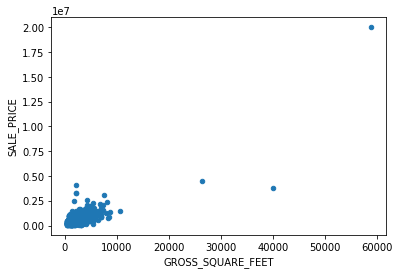

In [36]:
#first visualize the data
REStaten_.plot(x='GROSS_SQUARE_FEET',y='SALE_PRICE',kind='scatter')

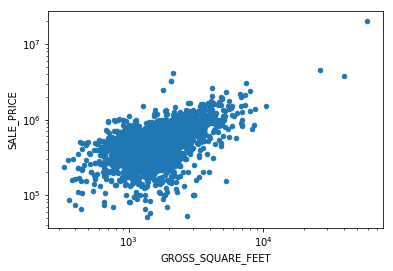

In [37]:
#as outliers dominate and the distributions are skewed consider log-scale
REStaten_.plot(x='GROSS_SQUARE_FEET',y='SALE_PRICE',kind='scatter', logx=True, logy=True)

In [38]:
#obtain values predicted by the regression
lm = smf.ols(formula='SALE_PRICE~GROSS_SQUARE_FEET-1', data = REStaten_).fit()
REStaten_['predicted_price']=lm.predict()

In [39]:
REStaten_[['SALE_PRICE','predicted_price']].head()

,SALE_PRICE,predicted_price
0,1185000,863958.708302
1,866000,642209.306505
2,530000,262643.447324
3,735000,509159.665426
4,475000,454730.266803


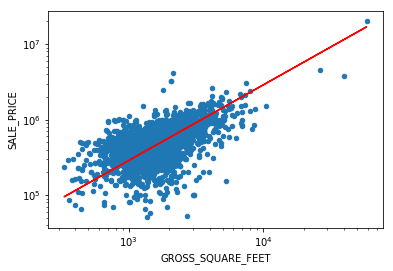

In [40]:
fig, ax = plt.subplots() #get axis to plot on
ax.set_xscale('log'); ax.set_yscale('log') #set up log-scale for axis
REStaten_.plot(ax=ax,kind='scatter',x='GROSS_SQUARE_FEET',y='SALE_PRICE') #show the data
ax.plot(REStaten_.GROSS_SQUARE_FEET,REStaten_.predicted_price,'r-'); #show the regression line

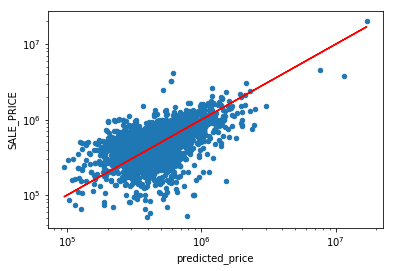

In [41]:
#another way - visualize actual values vs predicted (works also for multi-variate regressions)
fig, ax = plt.subplots() #get axis to plot on
ax.set_xscale('log'); ax.set_yscale('log') #set up log-scale for axis
REStaten_.plot(ax=ax,kind='scatter',x='predicted_price',y='SALE_PRICE') #show the data
ax.plot(REStaten_.predicted_price,REStaten_.predicted_price,'r-'); #show the regression line

### In-class task 1. Perform regressions on the remaining regressors: 
LAND_SQUARE_FEET,YEAR_BUILT,RESIDENTIAL_UNITS,COMMERCIAL_UNITS, with intercept. Visualize the regression fit

Report results (together with those for GROSS_SQ_FEET) in a data frame with the following columns: 
slope | intercept | R2, having regressors as index. R-squared could be obtained through lm.rsquared

## Multi-variate regression case

Now try multivariate regression on GROSS_SQUARE_FEET+LAND_SQUARE_FEET+YEAR_BUILT together

In [42]:
lm = smf.ols(formula='SALE_PRICE~GROSS_SQUARE_FEET+LAND_SQUARE_FEET+YEAR_BUILT', data = REStaten_).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:             SALE_PRICE   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     2873.
Date:                Sun, 29 Sep 2019   Prob (F-statistic):               0.00
Time:                        14:32:18   Log-Likelihood:                -66944.
No. Observations:                4866   AIC:                         1.339e+05
Df Residuals:                    4862   BIC:                         1.339e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -2.378e+06    2.1e+0

In [43]:
#notice that the coefficient for the gross_square_feet have changed again - likely due to the correlation with land size

Now try multivariate regression on RESIDENTIAL_UNITS+COMMERCIAL_UNITS together

In [44]:
lm = smf.ols(formula='SALE_PRICE~RESIDENTIAL_UNITS+COMMERCIAL_UNITS', data = REStaten_).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:             SALE_PRICE   R-squared:                       0.325
Model:                            OLS   Adj. R-squared:                  0.325
Method:                 Least Squares   F-statistic:                     1172.
Date:                Sun, 29 Sep 2019   Prob (F-statistic):               0.00
Time:                        14:32:18   Log-Likelihood:                -68468.
No. Observations:                4866   AIC:                         1.369e+05
Df Residuals:                    4863   BIC:                         1.370e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          3.142e+05   6971.52

And now combine all the variables together

In [45]:
lm = smf.ols(formula='SALE_PRICE~GROSS_SQUARE_FEET+LAND_SQUARE_FEET+YEAR_BUILT+RESIDENTIAL_UNITS+COMMERCIAL_UNITS', data = REStaten_).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:             SALE_PRICE   R-squared:                       0.642
Model:                            OLS   Adj. R-squared:                  0.641
Method:                 Least Squares   F-statistic:                     1740.
Date:                Sun, 29 Sep 2019   Prob (F-statistic):               0.00
Time:                        14:32:18   Log-Likelihood:                -66929.
No. Observations:                4866   AIC:                         1.339e+05
Df Residuals:                    4860   BIC:                         1.339e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -2.099e+06   2.16e+0

Again, the coefficients have changed, but now, surprisingly, now the impact of residential and commercial units seem to be negative!

This is because they are strongly correlated with house size and for the houses of the same size, slicing them into the larger number of smaller units does not seem to increase the price anymore. However we should be careful with interpretations when the regressors are correlated 

## Homework task 1
Analize the single familty houses (RESIDENTIAL_UNITS==1, COMMERCIAL_UNITS==0) separately

Q1. Find the single-family house with the highest price per square foot

In [46]:
#Single family house with the highest price per square foot
index = (REStaten_.RESIDENTIAL_UNITS == 1)&(REStaten_.COMMERCIAL_UNITS == 0)
#filter the data; loc accesses rows by boolean index (as opposed to integer positions done with iloc)
REStaten_Residential = REStaten_.loc[index].copy()
REStaten_Residential['SALE_PRICE_PER_SQUARE'] = REStaten_Residential.SALE_PRICE/REStaten_Residential.GROSS_SQUARE_FEET
#picking the higest price per square foot family house
REStaten_Residential.loc[REStaten_Residential['SALE_PRICE_PER_SQUARE'].idxmax()]

BOROUGH                                                                     5
NEIGHBORHOOD                                                    OAKWOOD-BEACH
BUILDING_CLASS_CATEGORY           01 ONE FAMILY DWELLINGS                    
TAX_CLASS_AT_PRESENT                                                        1
BLOCK                                                                    4678
LOT                                                                         1
EASE-MENT                                                                    
BUILDING_CLASS_AT_PRESENT                                                  A1
ADDRESS                                                     402 GUYON AVENUE 
APARTMENT_NUMBER                                                             
ZIP_CODE                                                                10306
RESIDENTIAL_UNITS                                                           1
COMMERCIAL_UNITS                                                

Q2. Build correlation matrix for YEAR_BUILT,GROSS_SQUARE_FEET, LAND_SQUARE_FEET

In [47]:
#Building a correlation matrix between YEAR_BUILT,GROSS_SQUARE_FEET, LAND_SQUARE_FEET for Single family houses
REStaten_Residential[['YEAR_BUILT', 'GROSS_SQUARE_FEET', 'LAND_SQUARE_FEET']].corr()

,YEAR_BUILT,GROSS_SQUARE_FEET,LAND_SQUARE_FEET
YEAR_BUILT,1.000000,0.143736,-0.260088
GROSS_SQUARE_FEET,0.143736,1.000000,0.515321
LAND_SQUARE_FEET,-0.260088,0.515321,1.000000


Q3. Perform the SALE_PRICE~GROSS_SQUARE_FEET+LAND_SQUARE_FEET+YEAR_BUILT regression using any of the methods above. Visualize the fit

In [48]:
#Performing the regression for SALE_PRICE~GROSS_SQUARE_FEET+LAND_SQUARE_FEET+YEAR_BUILT and visualizing the fit for single family houses
lm = smf.ols(formula='SALE_PRICE~GROSS_SQUARE_FEET+LAND_SQUARE_FEET+YEAR_BUILT', data = REStaten_Residential).fit()
REStaten_Residential['predicted_price_vs_3regs']=lm.predict()
REStaten_Residential[['SALE_PRICE','predicted_price_vs_3regs']].head()

,SALE_PRICE,predicted_price_vs_3regs
0,1185000,889604.821199
1,866000,746900.467101
2,530000,454567.005296
3,735000,643404.338376
4,475000,486649.989267


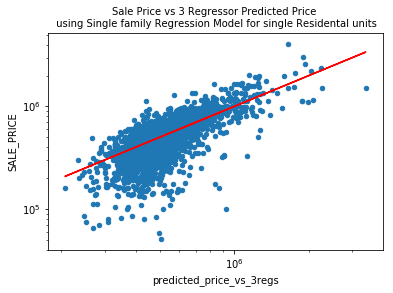

In [49]:
#Visualize actual values vs predicted (calculated using multi-variate regressions model) for single family houses
fig, ax = plt.subplots() #get axis to plot on
ax.set_title('Sale Price vs 3 Regressor Predicted Price \n using Single family Regression Model for single Residental units', fontsize=10)
ax.set_xscale('log'); ax.set_yscale('log') #set up log-scale for axis
REStaten_Residential.plot(ax=ax,kind='scatter',x='predicted_price_vs_3regs',y='SALE_PRICE') #show the data
ax.plot(REStaten_Residential.predicted_price_vs_3regs,REStaten_Residential.predicted_price_vs_3regs,'r-'); #show the regression line

Q4. Apply regression trained for single family houses from Q3 to predict prices for a different dataframe of duplexes (two residential units). Visualize the fit and compute the R2 over duplexes. We can compare it with the R2 of the regression trained for duplexes in task 2

In [50]:
#creating a new dataframe for holding duplexes data
index = (REStaten_.RESIDENTIAL_UNITS == 2)&(REStaten_.COMMERCIAL_UNITS == 0)
REStaten_Residential_Duplexes = REStaten_.loc[index].copy()

In [51]:
#Applying Regression trained for single family houses to duplex data frame
REStaten_Residential_Duplexes['predicted_price_vs_3regs_duplexes']=lm.predict(REStaten_Residential_Duplexes)
REStaten_Residential_Duplexes[['SALE_PRICE','predicted_price_vs_3regs_duplexes']].head()

,SALE_PRICE,predicted_price_vs_3regs_duplexes
98,771500,655991.067271
100,575000,664673.474653
102,807500,652818.667414
103,679000,530846.194646
105,517271,546484.382741


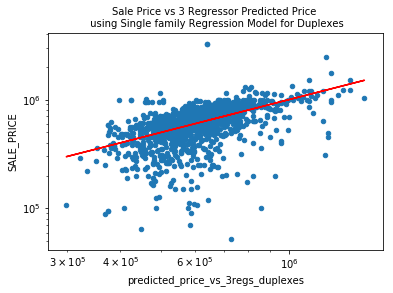

In [52]:
#Visualize actual values vs predicted (calculated using multi-variate regressions model) for Dublexes using single family regression model
fig, ax = plt.subplots() #get axis to plot on
ax.set_title('Sale Price vs 3 Regressor Predicted Price \n using Single family Regression Model for Duplexes', fontsize=10)
ax.set_xscale('log'); ax.set_yscale('log') #set up log-scale for axis
REStaten_Residential_Duplexes.plot(ax=ax,kind='scatter',x='predicted_price_vs_3regs_duplexes',y='SALE_PRICE') #show the data
ax.plot(REStaten_Residential_Duplexes.predicted_price_vs_3regs_duplexes,REStaten_Residential_Duplexes.predicted_price_vs_3regs_duplexes,'r-'); #show the regression line

In [53]:
#computing the R2 over duplexes
slope, intercept,r_value, p_value, std_err = stats.linregress(REStaten_Residential_Duplexes.predicted_price_vs_3regs_duplexes, REStaten_Residential_Duplexes.SALE_PRICE)
print("R-squared: %f" % r_value**2)

R-squared: 0.275327


## Homework task 2

Now consider houses with different numbers of residential units: repeat the SALE_PRICE~GROSS_SQUARE_FEET+LAND_SQUARE_FEET+YEAR_BUILT regression for houses with  RESIDENTIAL_UNITS==1,2 and "3 or above", COMMERCIAL_UNITS==0. Summarize the number of samples in each category, coefficients and r-squared values of the corresponding regressions in a dataframe with the following columns: samples,GROSS_SQUARE_FEET_coef,LAND_SQUARE_FEET_coef,YEAR_BUILT,coef,Intercept,R2. Make the number of RESIDENTIAL_UNITS (1,2 or '3+') an index

In [54]:
# Considering the Residential Unit 1,2 and 3 or above, creating dataframe of Residential capacity 3 or above, then use all to create regression model of each
# Creating a new dataframe for holding Residential capacity of 3 or above data
index = (REStaten_.RESIDENTIAL_UNITS >= 3)&(REStaten_.COMMERCIAL_UNITS == 0)
REStaten_Residential_3orAbove = REStaten_.loc[index].copy()
# here we have three data frame 
# REStaten_Residential with Residential capacity: 1
# REStaten_Residential_Duplexes with Residential capacity: 2
# REStaten_Residential_3orAbove with Residential capacity: 3 or above
# creating Regression model of each
unit_1_lm = smf.ols(formula='SALE_PRICE~GROSS_SQUARE_FEET+LAND_SQUARE_FEET+YEAR_BUILT', data = REStaten_Residential).fit()
unit_2_lm = smf.ols(formula='SALE_PRICE~GROSS_SQUARE_FEET+LAND_SQUARE_FEET+YEAR_BUILT', data = REStaten_Residential_Duplexes).fit()
unit_3orAbove_lm = smf.ols(formula='SALE_PRICE~GROSS_SQUARE_FEET+LAND_SQUARE_FEET+YEAR_BUILT', data = REStaten_Residential_3orAbove).fit()

In [55]:
# Summarizing the results of all models into dataframe
df_list = [unit_1_lm, unit_2_lm, unit_3orAbove_lm]
data = []
for model in df_list:
    data += [{'Samples': model.nobs, 'GROSS_SQUARE_FEET_coef': model.params.GROSS_SQUARE_FEET, 'LAND_SQUARE_FEET_coef': model.params.LAND_SQUARE_FEET ,'YEAR_BUILT_coef': model.params.YEAR_BUILT, 'Intercept': model.params.Intercept, 'R2': model.rsquared }] 

# Creates pandas DataFrame. 
df = pd.DataFrame(data, index =['1', '2', '3+'])
df
  

,GROSS_SQUARE_FEET_coef,Intercept,LAND_SQUARE_FEET_coef,R2,Samples,YEAR_BUILT_coef
1,147.183135,-1.837565e+06,29.869471,0.558615,3440.0,1030.027421
2,91.404097,-4.389802e+06,31.901931,0.314907,1299.0,2387.006042
3+,83.847380,-5.813505e+06,26.608053,0.841011,69.0,3168.788503


## Urban activity data

Recall urban population and activity data case from a previous class notebook

In [56]:
#Upload the main dataset
SMdata=pd.read_csv("data/Socio-mobility.csv",index_col=0)

In [57]:
#rename some of the columns for the sake of consistency and also to replace '-'
SMdata.rename(columns={'mobile-device_spatial':'mobile','citibike_spatial':'citibike','sr311_spatial':'sr311','subway_spatial':'subway','taxi_spatial':'taxi','twitter_spatial':'twitter'},inplace=True)

In [58]:
#also upload two other datasets from the last class - residential and working population
LEHDW=pd.read_csv("data/LEHD-work.csv",index_col=0)

In [59]:
#notice that residetial population here (from LEHD, based on the workforce residences) 
#is different from the one in the main dataset 
LEHDR=pd.read_csv("data/LEHD-resident.csv",index_col=0)

In [60]:
#merge the dataframes (inner merge on index - taxi zone number); take only the columns to use later
SMdata=SMdata[['population','mobile','citibike','sr311','subway','taxi','twitter']].merge(LEHDW[['total']].rename(columns={'total':'working'}), on=None, left_index=True, right_index=True, how='inner')

In [61]:
SMdata=SMdata.merge(LEHDR[['total']].rename(columns={'total':'residential'}), on=None, left_index=True, right_index=True, how='inner')

In [62]:
#glimpse into the final data
SMdata.head()

,population,mobile,citibike,sr311,subway,taxi,twitter,working,residential
tz,,,,,,,,,
3,32450.0,109300,0,700,225527.5,31960,480,4989,11398
4,27571.0,179644,31545,399,0.0,178515,85,2717,12318
5,26482.0,56271,0,490,0.0,3667,40,1191,10751
6,15896.0,147674,0,255,0.0,7456,88,2495,6729
7,77252.0,508255,0,1389,3336898.0,362180,2294,17223,43048


In [63]:
#get pair-wise column correlations
SMdata.corr()

,population,mobile,citibike,sr311,subway,taxi,twitter,working,residential
population,1.000000,0.670248,-0.210465,0.877397,-0.042691,-0.059860,-0.028276,-0.099852,0.969425
mobile,0.670248,1.000000,-0.066319,0.607098,0.219016,0.144768,0.214191,0.175743,0.646672
citibike,-0.210465,-0.066319,1.000000,-0.183276,0.486907,0.748109,0.372861,0.513090,-0.102762
sr311,0.877397,0.607098,-0.183276,1.000000,-0.010677,-0.026607,0.066799,-0.049597,0.865145
subway,-0.042691,0.219016,0.486907,-0.010677,1.000000,0.630203,0.496341,0.703456,0.020381
taxi,-0.059860,0.144768,0.748109,-0.026607,0.630203,1.000000,0.556061,0.720043,0.053496
twitter,-0.028276,0.214191,0.372861,0.066799,0.496341,0.556061,1.000000,0.626458,0.017787
working,-0.099852,0.175743,0.513090,-0.049597,0.703456,0.720043,0.626458,1.000000,-0.040786
residential,0.969425,0.646672,-0.102762,0.865145,0.020381,0.053496,0.017787,-0.040786,1.000000


But notice that some activities are not defined for the entire city. Would be more appropriate to correlate only where activity is defined

In [64]:
#auxiliary function to compute correlations between columns where both have data
def NZPopCorr(col1,col2):
    ind=(SMdata[col1]>0)&(SMdata[col2]>0)
    return np.corrcoef(SMdata[col1][ind],SMdata[col2][ind])[0][1]

In [65]:
#output a table with correlations between activities and population counts
PL=['population','residential','working']
ML=['taxi','subway','citibike','twitter','mobile','sr311']
pd.DataFrame([[NZPopCorr(M,P) for P in PL] for M in ML],columns=PL,index=ML) 

,population,residential,working
taxi,-0.064720,0.049633,0.719559
subway,-0.232504,-0.141712,0.720643
citibike,-0.126996,0.011210,0.319030
twitter,-0.032551,0.017787,0.626458
mobile,0.676604,0.646672,0.175743
sr311,0.869460,0.863358,-0.056116


Now we can implement a regression for urban activities a) vs population and b) vs LEHD residential and working population taken as separate regressors

## In-class task 2. 
Implement these regressions a) and b) for taxi and subway. No intercept

### Homework task 3: 
Q1. Implement all regressions of each activity vs residential and working population, no intercept in a cycle.
Create two bar plots of a) R2's b) coefficients 

In [104]:
# Creating regression model for each urban activity vs residential and working population
Dependent_var_list = ['taxi','subway','citibike','twitter','mobile','sr311']
Regression_Result = {}
for dependentVar in Dependent_var_list:
    Regression_Result[dependentVar+'_lm'] = smf.ols(formula= dependentVar+'~residential+working-1', data = SMdata.loc[SMdata[dependentVar]>0]).fit()

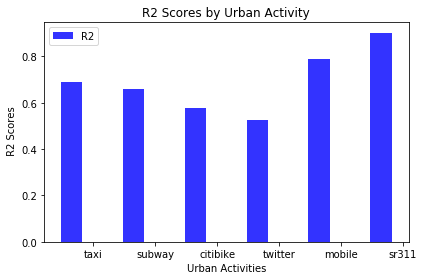

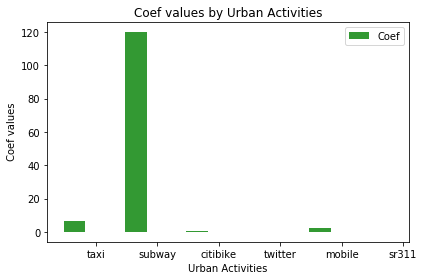

In [105]:
# Creating array for R2 and coef for each urban activity with residential
R2_list = []
Coef_list = []
for dependentVar in Dependent_var_list:
    R2_list += [Regression_Result[dependentVar+'_lm'].rsquared]
    Coef_list += [Regression_Result[dependentVar+'_lm'].params[regressor]]

# create R2 bar plot
fig, ax = plt.subplots()
index = np.arange(len(Dependent_var_list))
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, R2_list, bar_width,
alpha=opacity,
color='b',
label='R2')


plt.xlabel('Urban Activities')
plt.ylabel(' R2 Scores')
plt.title('R2 Scores by Urban Activity')
plt.xticks(index + bar_width, Dependent_var_list)
plt.legend()

plt.tight_layout()
plt.show()

# create Coef bar plot
fig, ax = plt.subplots()
index = np.arange(len(Dependent_var_list))
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, Coef_list, bar_width,
alpha=opacity,
color='g',
label='Coef')


plt.xlabel('Urban Activities')
plt.ylabel(' Coef values')
plt.title('Coef values by Urban Activities')
plt.xticks(index + bar_width, Dependent_var_list)
plt.legend()

plt.tight_layout()
plt.show()

Q2. Create a heatmap of the **log-ratios** between actual taxi ridership vs regression prediction to see where ridership is over/underestimated. Use taxi zones shapefile included in the data

In [123]:
#Using the already created regression model in Question 1 for taxi vs working and residential population i.e Regression_Result['taxi_lm']
print(Regression_Result['taxi_lm'].summary())

                            OLS Regression Results                            
Dep. Variable:                   taxi   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.685
Method:                 Least Squares   F-statistic:                     279.9
Date:                Sun, 29 Sep 2019   Prob (F-statistic):           6.01e-65
Time:                        17:06:18   Log-Likelihood:                -3426.8
No. Observations:                 256   AIC:                             6858.
Df Residuals:                     254   BIC:                             6865.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
residential     3.5450      0.644      5.508      

In [124]:
#Cleaning SMdata and then predicting the taxi ridership on SMdata
index = (SMdata.taxi > 0)
#filter the data; loc accesses rows by boolean index (as opposed to integer positions done with iloc)
updated_SMdata = SMdata.loc[index].copy()

In [125]:
updated_SMdata['predicted_taxiRidership']=lm.predict()
updated_SMdata[['taxi','predicted_taxiRidership']].head()

,taxi,predicted_taxiRidership
tz,,
3,31960,168040.006194
4,178515,170858.168050
5,3667,171487.185934
6,7456,177601.771177
7,362180,142161.898501


In [142]:
#Cleaning the Predicted values and removing 0's
index = updated_SMdata.predicted_taxiRidership>0
new_SMdata = updated_SMdata.loc[index].copy()

In [143]:
#taking the ration of Actual taxi ridership vs predicted taxi ridership and taking log of Ratio
new_SMdata['log_taxi_vs_predicted_taxiRidership']= np.log1p(new_SMdata.taxi/new_SMdata.predicted_taxiRidership)
new_SMdata.head()

,population,mobile,citibike,sr311,subway,taxi,twitter,working,residential,predicted_taxiRidership,taxi_vs_predicted_taxiRidership,log_taxi_vs_predicted_taxiRidership
tz,,,,,,,,,,,,
3,32450.0,109300,0,700,225527.5,31960,480,4989,11398,168040.006194,0.309922,0.174115
4,27571.0,179644,31545,399,0.0,178515,85,2717,12318,170858.168050,2.037427,0.715307
5,26482.0,56271,0,490,0.0,3667,40,1191,10751,171487.185934,0.043573,0.021158
6,15896.0,147674,0,255,0.0,7456,88,2495,6729,177601.771177,0.147597,0.041124
7,77252.0,508255,0,1389,3336898.0,362180,2294,17223,43048,142161.898501,1.475281,1.266288


In [93]:
#read shapefiles of NYC taxi zones
tzs=gpd.read_file('data/taxi_zones/taxi_zones.shp')

In [144]:
tzs['Result']= tzs.LocationID.map(new_SMdata.log_taxi_vs_predicted_taxiRidership)
tzs.head()

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry,Log_Actual_taxi_to_Predicted,Result
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.769506663 256767.6975403726,...",NaN,0.174115
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.4667968601 203714.0759887695,...",-1.171436,0.715307
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.3104932606 144283.335850656, ...",0.711688,0.021158
5,6,0.150491,0.000606,Arrochar/Fort Wadsworth,6,Staten Island,"POLYGON ((966568.7466657609 158679.854687795, ...",-3.133312,0.041124
6,7,0.107417,0.000390,Astoria,7,Queens,"POLYGON ((1010804.217962816 218919.6406951398,...",-1.913269,1.266288


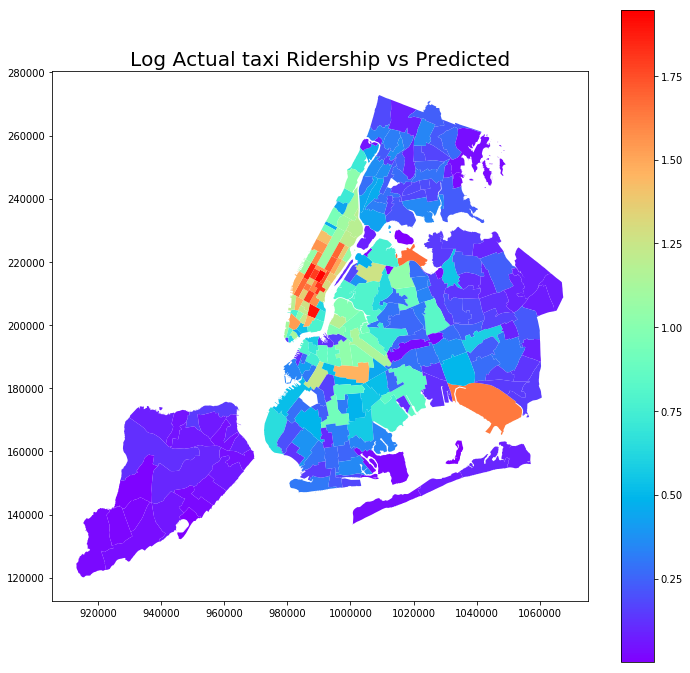

In [150]:
#color the taxi zones based on the value of Log-ratio of Actual taxi vs predicted taxi ridership
f, ax = plt.subplots(1, figsize=(12, 12))
ax.set_title("Log Actual taxi Ridership vs Predicted", fontsize=20)
tzs.plot(axes=ax, column='Result', legend=True, cmap='rainbow')